<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/MHC2024008_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: load the cifar10 dataset

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


In [ ]:
# prompt: preprocess the data (normalize pixels, one-hot encode
# labels)

import numpy as np

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# prompt: Design a CNN with:
#  At least 7 convolutional layers + activation.
#  2 pooling layers.
# 7 dense layers for classification.

import tensorflow as tf
import numpy as np

# ... (Your existing code for loading and preprocessing CIFAR-10 data)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

batch_size = 64
epochs = 2 # For demonstration, increase for better results.

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,207,690 (69.46 MB)

 Trainable params: 18,207,690 (69.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.2150 - loss: 2.0618 - val_accuracy: 0.4135 - val_loss: 1.5728
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4651 - loss: 1.4436 - val_accuracy: 0.5614 - val_loss: 1.1873
Test loss: 1.1872811317443848
Test accuracy: 0.5613999962806702


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6063 - loss: 1.1008 - val_accuracy: 0.6391 - val_loss: 1.0237
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7019 - loss: 0.8591 - val_accuracy: 0.6928 - val_loss: 0.9076
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.7672 - loss: 0.6683 - val_accuracy: 0.7063 - val_loss: 0.8930
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8260 - loss: 0.5029 - val_accuracy: 0.7086 - val_loss: 0.9085
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8729 - loss: 0.3764 - val_accuracy: 0.7099 - val_loss: 0.9983
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9125 - loss: 0.2649 - val_accuracy: 0.7162 - val_loss: 1.0464
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9394 - loss: 0.1881 - val_accuracy: 0.7223 - val_loss: 1.1755
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9545 - loss: 0.1434 - 

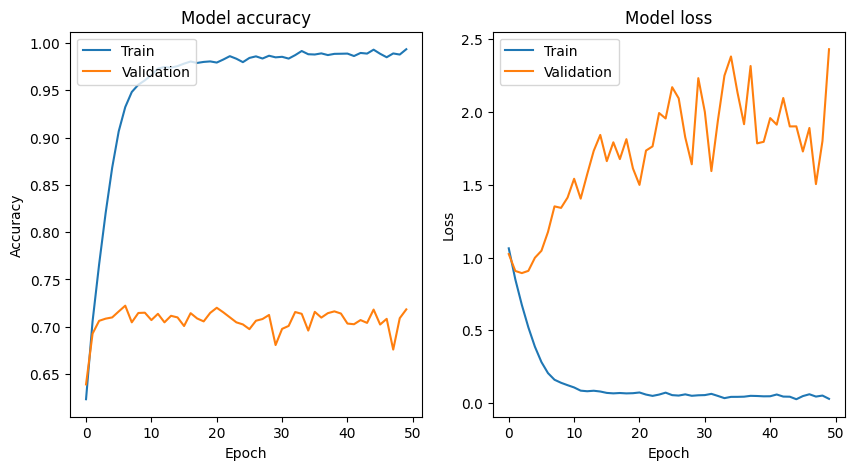

Test loss: 2.4300599098205566
Test accuracy: 0.7184000015258789


In [ ]:
# prompt: Training & Evaluation
# o Train the model for 50 epochs.
# o Plot training/validation accuracy and loss.
# o Report test accuracy.

import matplotlib.pyplot as plt

# ... (Your existing code)

batch_size = 64
epochs = 50  # Increased epochs for better training

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
# prompt: o Modify  hyperparameter (e.g., filters, optimizer,learning rate) for 50 epochs and compare
# results.
# o Add a dropout layer and analyze its impact.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model with modifications
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]), # Increased filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25), # Added dropout layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25), # Added dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # Reduced Dense layers and neurons
    tf.keras.layers.Dropout(0.5), # Added dropout layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # Modified learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

batch_size = 64
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,460,106 (17.01 MB)

 Trainable params: 4,460,106 (17.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.2908 - loss: 1.9177 - val_accuracy: 0.4998 - val_loss: 1.3788
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4997 - loss: 1.3855 - val_accuracy: 0.5818 - val_loss: 1.1897
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5776 - loss: 1.1915 - val_accuracy: 0.6358 - val_loss: 1.0477
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6226 - loss: 1.0712 - val_accuracy: 0.6707 - val_loss: 0.9437
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6504 - loss: 0.9867 - val_accuracy: 0.6928 - val_loss: 0.8841
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6842 - loss: 0.9017 - val_accuracy: 0.6979 - val_loss: 0.8716
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7028 - loss: 0.8475 - val_accuracy: 0.7245 - val_loss: 0.7948
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7238 - loss: 0.7886 - 

In [ ]:
# prompt: o Compare your model with any pretrained cnn model

import tensorflow as tf

# Load a pre-trained model (e.g., ResNet50)
pretrained_model = tf.keras.applications.ResNet50(
    weights='imagenet',  # Use pre-trained weights
    include_top=False,    # Remove the classification layer
    input_shape=(32, 32, 3) # Adjust input shape for CIFAR-10
)

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
x = pretrained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling
x = tf.keras.layers.Dense(1024, activation='relu')(x) # Add dense layer
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x) #Output layer

model_pretrained = tf.keras.models.Model(inputs=pretrained_model.input, outputs=predictions)

model_pretrained.compile(loss='categorical_crossentropy',
              optimizer='adam', #You can change the optimizer
              metrics=['accuracy'])

model_pretrained.summary()

#Train the model
batch_size = 64
epochs = 10 # Adjust as needed

history_pretrained = model_pretrained.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# Evaluate the model
score_pretrained = model_pretrained.evaluate(x_test, y_test, verbose=0)
print('Pretrained Model Test loss:', score_pretrained[0])
print('Pretrained Model Test accuracy:', score_pretrained[1])

#Compare the results with your previous model
print('Previous model Test loss:', score[0])
print('Previous model Test accuracy:', score[1])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,696,138 (98.02 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2122 - loss: 2.2995 - val_accuracy: 0.3151 - val_loss: 1.8819
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3131 - loss: 1.8996 - val_accuracy: 0.3160 - val_loss: 1.8994
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3287 - loss: 1.8446 - val_accuracy: 0.3346 - val_loss: 1.8408
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3423 - loss: 1.8167 - val_accuracy: 0.3444 - val_loss: 1.7952
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3610 - loss: 1.7733 - val_accuracy: 0.3789 - val_loss: 1.7292
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3692 - loss: 1.7432 - val_accuracy: 0.3678 - val_loss: 1.7312
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3733 - loss: 1.7335 - val_accuracy: 0.3905 - val_loss: 1.7088
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3749 - loss: 1.7284 - 

Ques. How convolution, pooling, and activation functions help in feature
extraction?

Ans: 1. Convolutional Layers:

Feature Detectors: Convolutional layers are the core building blocks of CNNs. They act as feature detectors by applying a set of learnable filters (also called kernels) to the input data.
Local Receptive Fields: Each filter focuses on a small region of the input (a local receptive field) and performs a dot product operation between the filter weights and the corresponding input pixels. This operation effectively extracts local patterns or features from the input.
Hierarchical Feature Learning: As the network processes the input through multiple convolutional layers, it progressively learns more complex and abstract features. Early layers might detect simple edges and textures, while deeper layers learn to recognize higher-level features like shapes and objects.
2. Pooling Layers:

Downsampling and Invariance: Pooling layers reduce the spatial dimensions (width and height) of the feature maps generated by convolutional layers. This downsampling has two main benefits:
Reduced Computational Cost: Fewer parameters need to be learned and processed in subsequent layers.
Translation Invariance: The network becomes more robust to small shifts or variations in the position of features within the input.
Types of Pooling: Common pooling operations include max pooling (taking the maximum value within a pooling window) and average pooling (taking the average value).
3. Activation Functions:

Introducing Non-linearity: Activation functions are applied to the output of convolutional and dense layers. They introduce non-linearity into the network, which is crucial for learning complex patterns. Without activation functions, a CNN would essentially be a linear transformation, limiting its ability to model intricate relationships in data.
Common Activation Functions: Popular choices include:
ReLU (Rectified Linear Unit): Replaces negative values with zero, allowing the network to learn faster and avoid the vanishing gradient problem.
Sigmoid: Outputs values between 0 and 1, often used in the final layer for binary classification.
Softmax: Generalization of sigmoid for multi-class classification, producing a probability distribution over the classes.


Ques. Why CNNs are better than fully connected networks for image
classification?
Ans: Convolutional Neural Networks (CNNs) are generally preferred over fully connected networks for image classification tasks due to following factors:
1. Spatial Hierarchy and Feature Extraction:

CNNs: CNNs excel at capturing spatial hierarchies in images. They use convolutional layers with local receptive fields to extract features from specific regions of the image, progressively learning more complex features as the network deepens.
Fully Connected Networks: In contrast, fully connected networks treat each pixel as an independent input, ignoring the spatial relationships between pixels. This makes them less efficient at extracting meaningful features from images.
2. Parameter Efficiency:

CNNs: Convolutional layers share weights across the entire image, significantly reducing the number of parameters compared to fully connected networks. This makes CNNs more memory-efficient and faster to train, especially for large images.
Fully Connected Networks: Fully connected networks have a separate weight for each connection between neurons, leading to a massive number of parameters, which can easily lead to overfitting and slow training.
3. Translation Invariance:

CNNs: Pooling layers in CNNs introduce translation invariance, meaning the network can recognize objects regardless of their position in the image. This is crucial for image classification, where objects can appear at different locations.
Fully Connected Networks: Fully connected networks are sensitive to the precise location of features, making them less robust to variations in object position.
4. Local Connectivity:

CNNs: CNNs exploit the local connectivity of images, meaning nearby pixels are more likely to be related than distant pixels. Convolutional layers process information from local receptive fields, capturing these local dependencies.
Fully Connected Networks: Fully connected networks consider all pixels equally, regardless of their spatial proximity, leading to a loss of information about local structures.
5. Data Augmentation:

CNNs: CNNs work well with data augmentation techniques (e.g., flipping, cropping, rotating images), which artificially increase the size of the training dataset and improve the network's ability to generalize to new, unseen images.
Fully Connected Networks: While data augmentation can also be used with fully connected networks, it is often less effective due to their sensitivity to precise pixel locations.